# Introduction
A *channel* is a medium through which communication can happen. One specific type of channel is the binary channel - messages and codewords are. This is the type of channel that will be considered here. In general, the channel is noisy - that is, communications are subject to errors. The channel coding problem is then to design a code such that errors are detected/ corrected to some extent.
# Hamming code
One family of error correcting codes is **Hamming codes**. Error detection is achieved through redundancy. Instead of messages being naively mapped one-to-one to codewords, functions of several message letters are mapped to codewords. For example, the (7,4) Hamming code accepts messages of the form ($s_1,s_2,s_3,s_4$) and assigns codewords ($p_1,p_2,p_3,s_1,s_2,s_3,s_4$) according to
$$ p_1 = s_1 + s_3 + s_4 $$
$$ p_2 = s_1 + s_2 + s_3 $$
$$ p_3 = s_2 + s_3 + s_4 $$
These codewords can then be checked for parity.
## Redundancy
As shown above, message integrity is achieved at the expense of message length due to redundancy. For a general Hamming code, messages of length $2^u - u - 1$ are mapped to codewords of length $2^u - 1$. This is shown in graphical form:


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

u = np.arange(2,10,1)
c = 2 ** u - 1
m = 2 ** u - u -1
f = c/m
fig, ax = plt.subplots()
ax.plot(u, f)
ax.set(xlabel='Dimension', ylabel='Redundancy factor', title='Redundancy of Hamming Codes')
plt.show()

## Latency
As can be seen, for long codeword/ message length, the redundancy approaches 0. The trade-off is that for long messages, the latency increases - before decoding can begin, the target must collect many message letters.
# Sphere packing
For Hamming codes of the from shown above, it has been shown that the codes correspond to hard-sphere packing in the high-dimensional function space over the message letter combinations. The goal of the packing problem is then to find a configuration such that the distance between spheres is some fixed number of errors. In general, the language defined over 3 data bits looks like a cube, with each vertex being accessible:
    o - - - o
   --      --
  --      - - 
o --- - o   -
-  o    -   o
- -     -  -
--      - -
o - - - o
If we impose a constraint on the Hamming distance, we instead get a tetrahedral:
    o - - - x
   --      --
  --      - - 
x --- - o   -
-  x    -   o
- -     -  -
--      - -
o - - - x
If again we impose a constraint on the Hamming distance, we get now a line:
    x - - - o
   --      --
  --      - - 
x --- - x   -
-  x    -   x
- -     -  -
--      - -
o - - - x
The important thing to note here is that we maintain the number of dimensions, but gradually reduce the number of values available. Thus, a non-trivial feature of this model is that changes in radius and changes in the number of values (spheres) should be somehow correlated.

In [ ]:
from packing_problem import *
import time as t
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.ion()
nsample = 20
nrn = 20
low = 1
high = 100
step = (high - low)/(nrn-1)
ns = np.arange(low,high+1,step,dtype=int)
rs = np.linspace(0.1, 0.9, nrn)
ds = np.zeros((nrn-1, nsample))
accepts = np.zeros(nsample)
dist = np.zeros(nsample)
dists = np.zeros((nrn-1, nsample))
for i in range(0,nrn-1):
  for j in range(nrn-1):
    for k in range(nsample-1):
      h = HardSpherePacking(number_balls=ns[i], relative_ball_diameter=rs[j], dimensions=3, number_samples=200)
      h.fit()
      accept = np.round(h.acceptance_rate,6)
      accepts[k] = accept 
      dist[k] = h.all_distances(h.coordinates)
    ds[i][j] = np.mean(accepts)
    dists[i][j] = np.mean(dist)
plt.matshow(ds)
plt.show()

As can be seen from the above matrix, this is indeed the case.
# 7,4 Hamming code
One specific case of Hamming codes is the (7,4) Hamming code. What does the analysis of this code show us?
Recall that the number of data bits in the Hamming code is $ 2^u - u -1$, while the total number of bits is $2^u-1$. Thus, the redundancy is of interest and has the form
$$ r = \frac{2^u-u-1}{2^u-1} $$


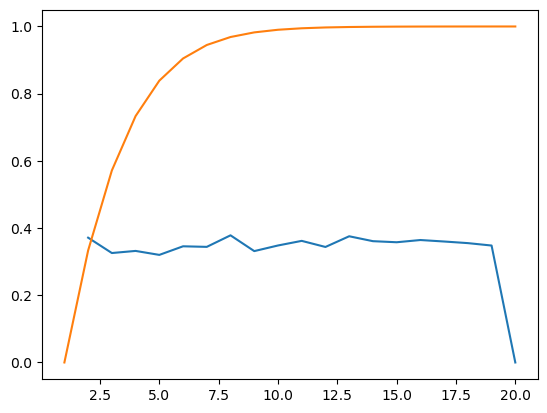

In [16]:
from packing_problem import *
import time as t
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.ion()
nsample = 20
nrn = 20
low = 1
high =21 
step = (high - low)/(nrn-1)
ns = np.arange(low,high+1,step,dtype=int)
rs = (2 ** ns - ns -1)/(2 ** ns - 1)
ds = np.zeros(nrn)
accepts = np.zeros(nsample)
dist = np.zeros(nsample)
dists=np.zeros(nrn)
for i in range(0,nrn-1):
  for j in range(nsample-1):
    h = HardSpherePacking(number_balls=ns[i],relative_ball_diameter=.,dimensions=4, number_samples=400)
    h.fit()
    accept = np.round(h.acceptance_rate,6)
    accepts[j] = accept 
    dist[j] = np.mean(h.all_distances(h.coordinates))
    
  ds[i] = np.mean(accepts)
  dists[i] = np.mean(dist)
plt.plot(ns, dists)
plt.plot(ns,rs)
plt.show()


The shape of this plot suggests there is a tradeoff - at high number of spheres (allowed values), we achieve negligible redundancy. However, the acceptance rate decreases for high number; the packing becomes less achievable. In the channel coding problem, this means errors are not correctable. Thus, we see a cross in these considerations near n = 7, which corresponds to the (7,4) Hamming code. Does this trend continue into higher dimensions?

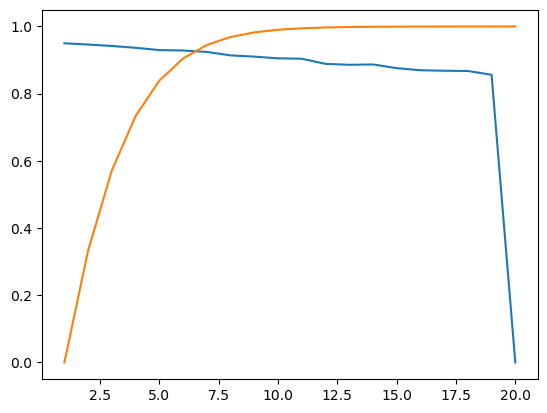

In [15]:
from packing_problem import *
import time as t
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.ion()
nsample = 20
nrn = 20
low = 1
high =21 
step = (high - low)/(nrn-1)
ns = np.arange(low,high+1,step,dtype=int)
rs = (2 ** ns - ns -1)/(2 ** ns - 1)
ds = np.zeros(nrn)
accepts = np.zeros(nsample)
dist = np.zeros(nsample)
dists = np.zeros(nrn)
for i in range(0,nrn-1):
  for j in range(nsample-1):
    h = HardSpherePacking(number_balls=ns[i], dimensions=7, number_samples=200)
    h.fit()
    accept = np.round(h.acceptance_rate,6)
    accepts[j] = accept 
    dists[j] = np.mean(h.all_distances(h.coordinates))

  ds[i] = np.mean(accepts)
  dists[i] = np.mean(dist)
plt.plot(ns, dists)
plt.plot(ns,rs)
plt.show()